In [1]:
run_name = 'current'

In [2]:
import os
import glob
from functools import reduce

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Client side analysis

In [29]:
# read in the data
data_dict = dict()

for d in glob.glob("./results/" + run_name + "/httperf_*_percentiles"):
    data_list = []
    for i in glob.glob(d + "/httperf_client_*.csv"):
        data_list.append(pd.read_csv(i, header=0, na_filter=False))
    
    data_frame = pd.DataFrame()
    if len(data_list) > 0:
        for i in list(data_list[0]):
            data_frame[i] = reduce(lambda x, y: x + y, [data_list[j][i] for j in range(len(data_list))])

        data_frame['Response time'] = reduce(lambda x, y: x + y, [data_list[j]['Response time'] 
                                                                  for j in range(len(data_list))]) / len(data_list)
    data_dict[os.path.basename(d)] = data_frame

### 1. Request rate analysis

In [30]:
plot_request_unbalance = pd.DataFrame()
plot_request_balance = pd.DataFrame()

plot_request_unbalance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
plot_request_balance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
    
for d in data_dict:
    if '_unbalance_' in d:
        plot_request_unbalance['Request rate - ' + d] = data_dict[d]['Request rate']
    if '_balance_' in d:
        plot_request_balance['Request rate - ' + d] = data_dict[d]['Request rate']

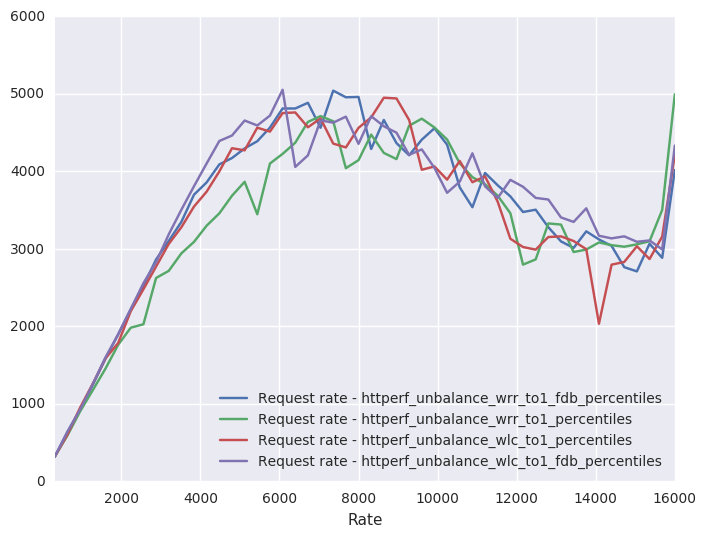

In [31]:
plot_request_unbalance.plot('Rate')

In [32]:
# plot_request_balance.plot('Rate')

In [33]:
# plot_request_unbalance.describe()

In [34]:
# plot_request_balance.describe()

### 2. Response time analysis

In [35]:
plot_response_unbalance = pd.DataFrame()
plot_response_balance = pd.DataFrame()

plot_response_unbalance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
plot_response_balance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
    
for d in data_dict:
    if '_unbalance_' in d:
        plot_response_unbalance['Response time - ' + d] = data_dict[d]['Response time']
    if '_balance_' in d:
        plot_response_balance['Response time - ' + d] = data_dict[d]['Response time']

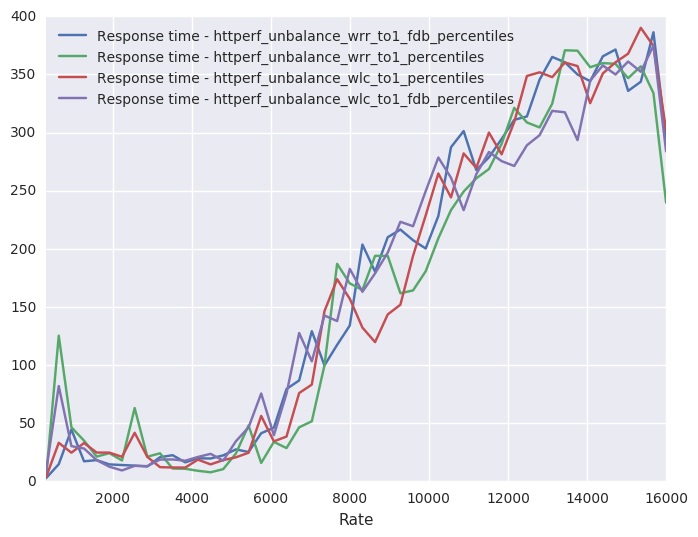

In [36]:
plot_response_unbalance.plot('Rate')

In [37]:
# plot_response_balance.plot('Rate')

In [38]:
# plot_response_unbalance.describe()

In [39]:
# plot_response_balance.describe()

### 3. Success rate analysis

In [40]:
plot_success_unbalance = pd.DataFrame()
plot_success_balance = pd.DataFrame()

plot_success_unbalance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
plot_success_balance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
    
for d in data_dict:
    if '_unbalance_' in d:
        plot_success_unbalance['Success rate - ' + d] = (data_dict[d]['Response status 2xx'] + 
                                                         data_dict[d]['Response status 3xx']) / data_dict[d]['Number of requests'] * 100.0
    if '_balance_' in d:
        plot_success_balance['Success rate - ' + d] = (data_dict[d]['Response status 2xx'] + 
                                                       data_dict[d]['Response status 3xx']) / data_dict[d]['Number of requests'] * 100.0

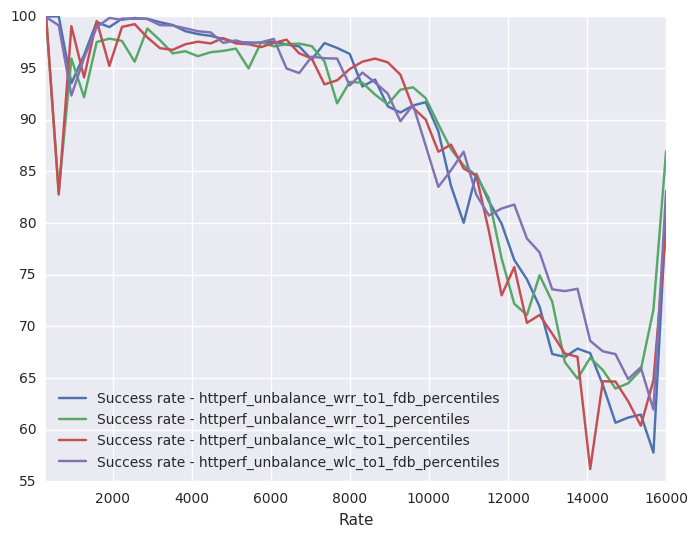

In [41]:
plot_success_unbalance.plot('Rate')

In [42]:
# plot_success_balance.plot('Rate')

In [43]:
# plot_success_unbalance.describe()

In [44]:
# plot_success_balance.describe()

### 4. Response rate analysis (percentiles)

In [50]:
plot_rrp_unbalance_list = []
plot_rrp_balance_list = []
for i in ['Response rate 50%', 'Response rate 66%', 'Response rate 75%', 'Response rate 80%', 'Response rate 90%', 
          'Response rate 95%', 'Response rate 98%', 'Response rate 99%', 'Response rate 100%']:
    plot_rrp_unbalance = pd.DataFrame()
    plot_rrp_balance = pd.DataFrame()

    plot_rrp_unbalance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
    plot_rrp_balance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
    
    for d in data_dict:
        if '_unbalance_' in d:
            plot_rrp_unbalance[i + ' - ' + d] = data_dict[d][i]
        if '_balance_' in d:
            plot_rrp_balance[i + ' - ' + d] = data_dict[d][i]
    
    plot_rrp_unbalance_list.append(plot_rrp_unbalance)
    plot_rrp_balance_list.append(plot_rrp_balance)

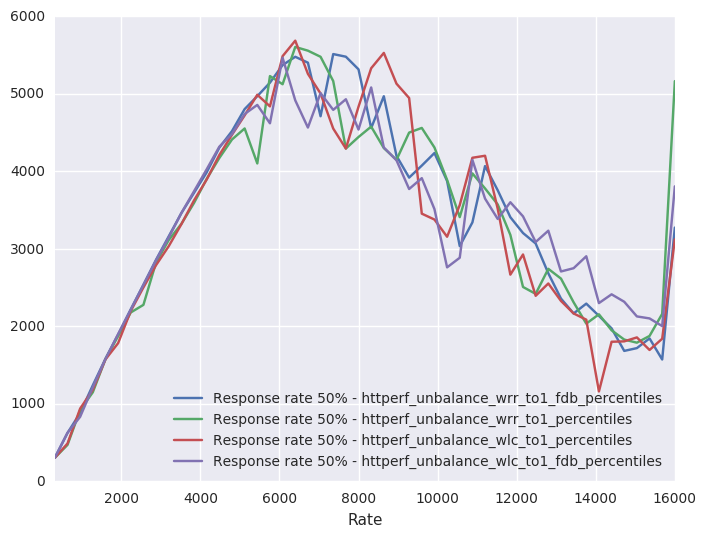

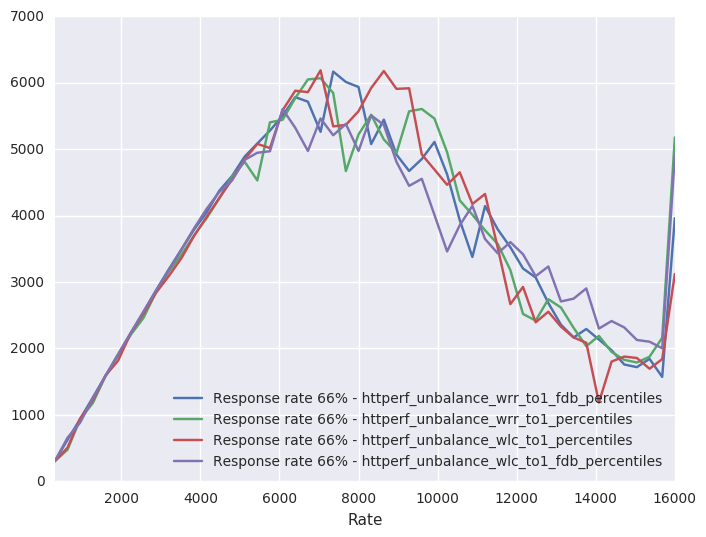

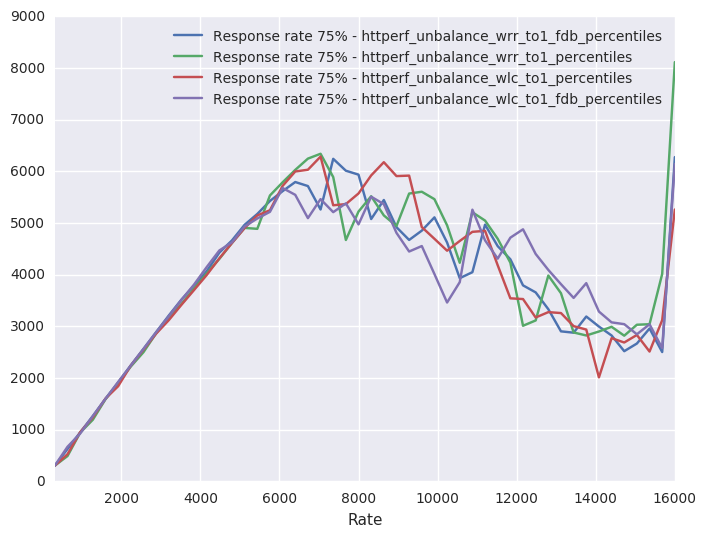

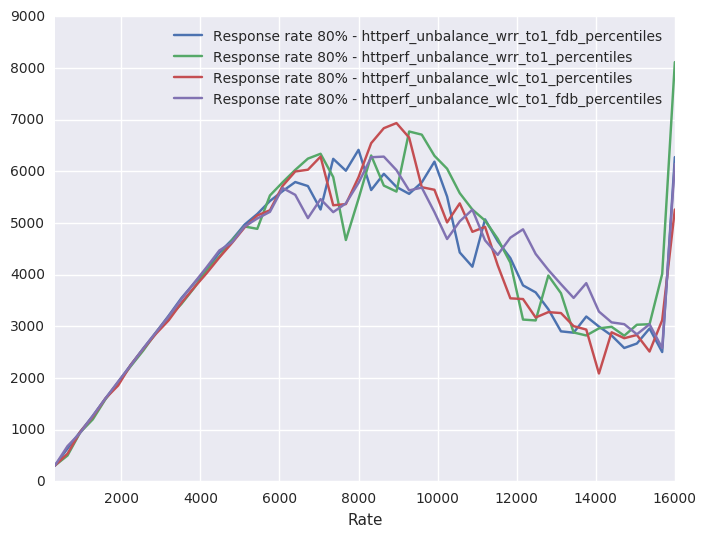

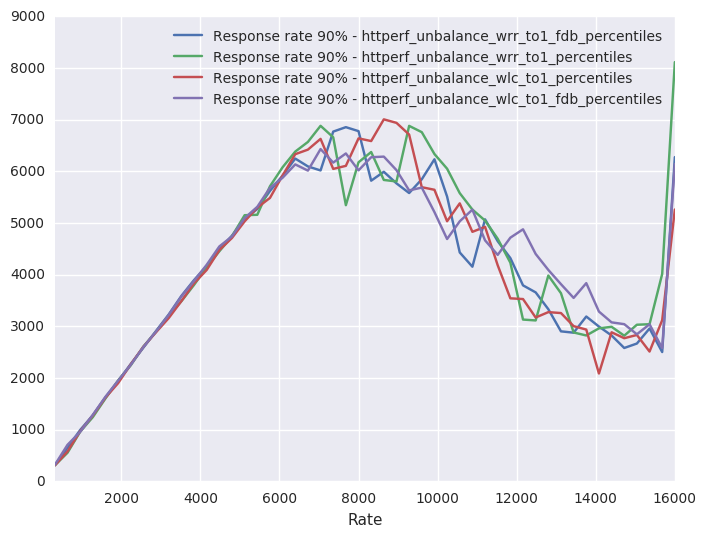

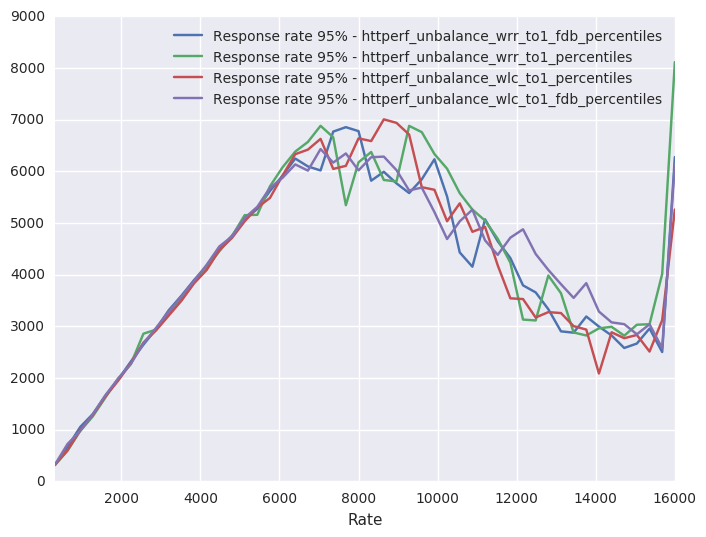

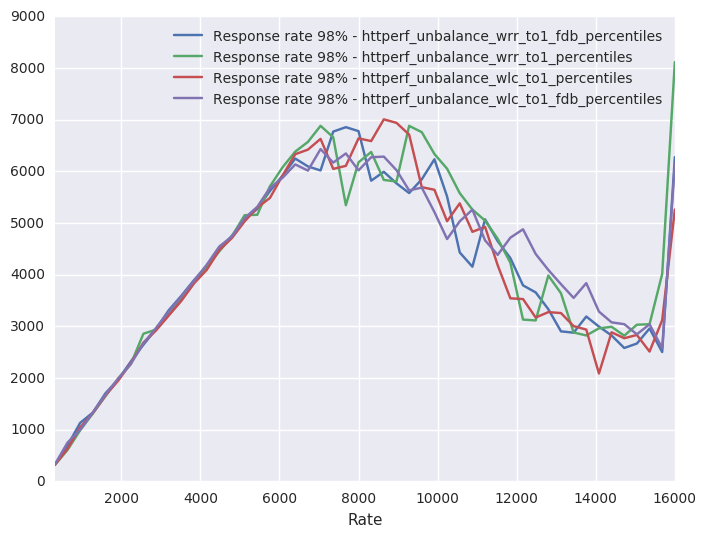

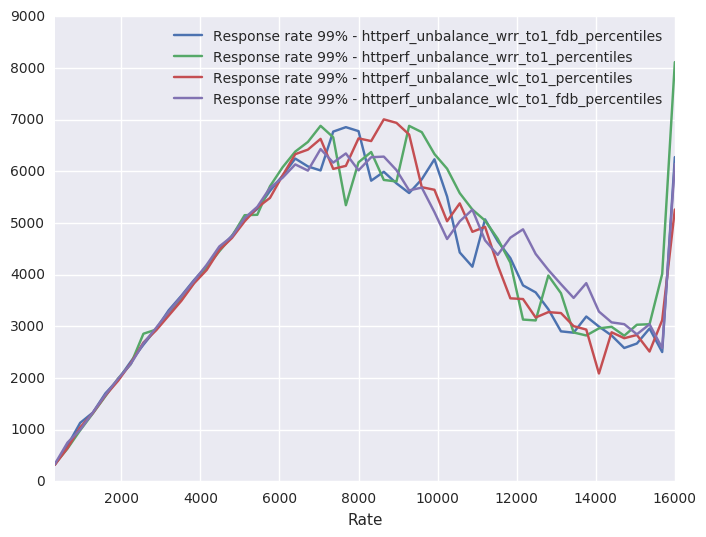

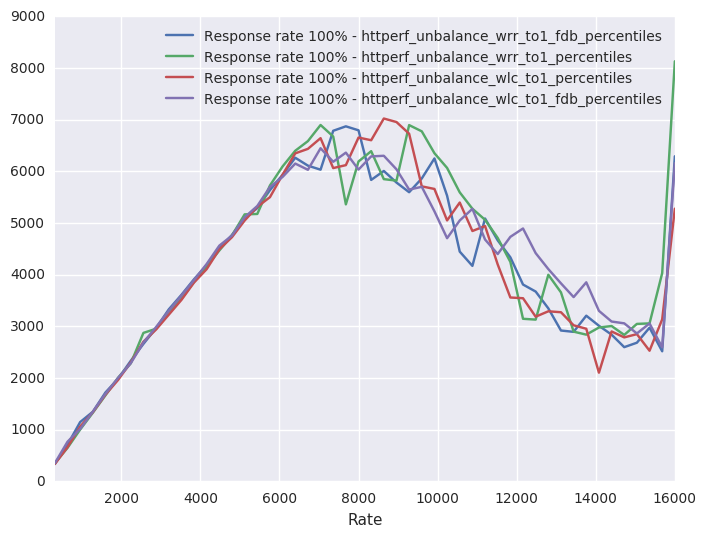

In [51]:
for i in plot_rrp_unbalance_list:
    i.plot('Rate')

In [ ]:
# for i in plot_rrp_balance_list:
#     i.plot('Rate')

### 4. Response time analysis (percentiles)

In [69]:
plot_rtp_unbalance_list = []
plot_rtp_balance_list = []
for i in ['Response time 50%', 'Response time 66%', 'Response time 75%', 'Response time 80%', 'Response time 90%', 
          'Response time 95%', 'Response time 98%', 'Response time 99%', 'Response time 100%']:
    plot_rtp_unbalance = pd.DataFrame()
    plot_rtp_balance = pd.DataFrame()

    plot_rtp_unbalance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
    plot_rtp_balance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
    
    for d in data_dict:
        if '_unbalance_' in d:
            plot_rtp_unbalance[i + ' - ' + d] = data_dict[d][i]
        if '_balance_' in d:
            plot_rtp_balance[i + ' - ' + d] = data_dict[d][i]
    
    plot_rtp_unbalance_list.append(plot_rtp_unbalance)
    plot_rtp_balance_list.append(plot_rtp_balance)

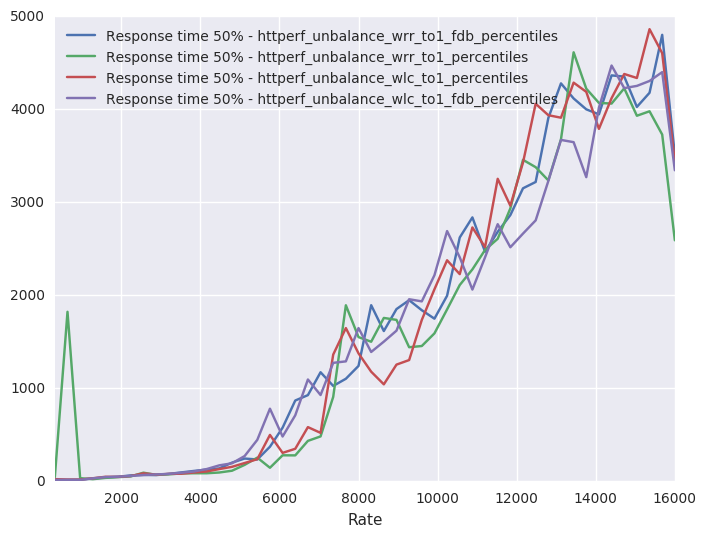

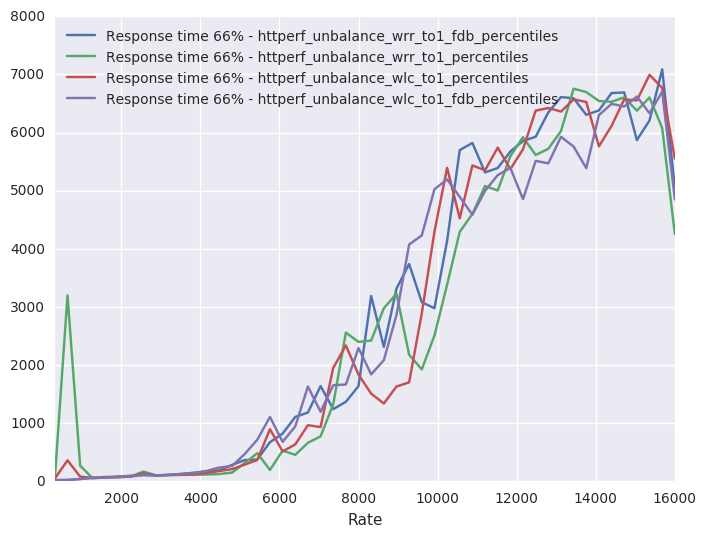

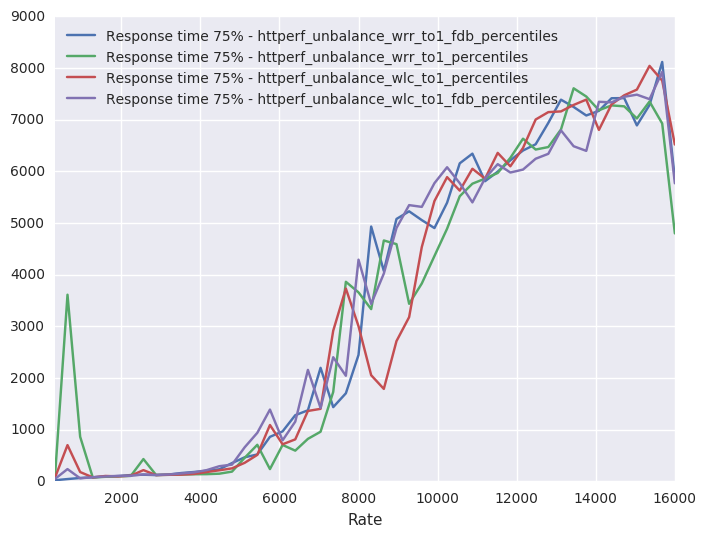

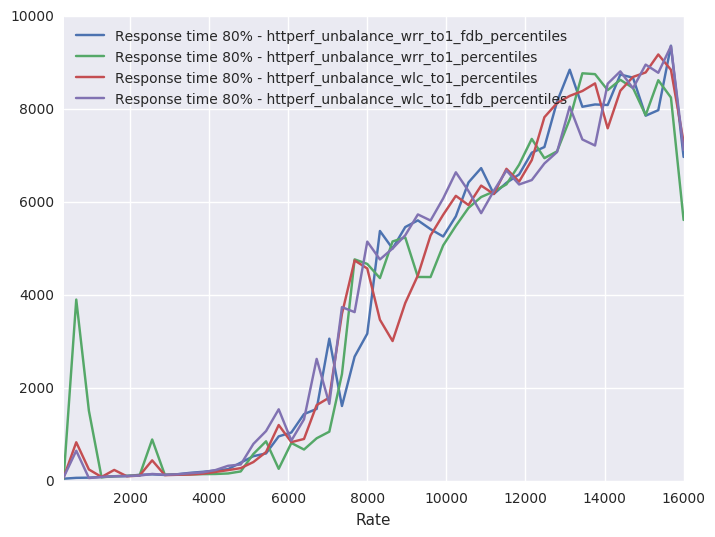

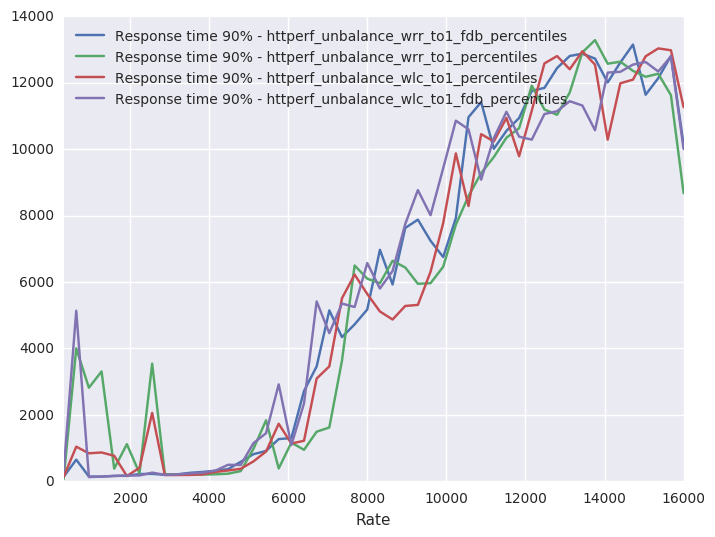

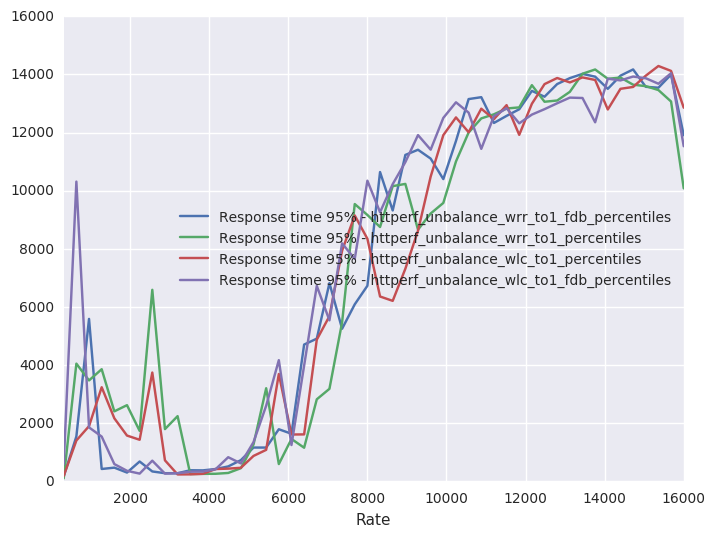

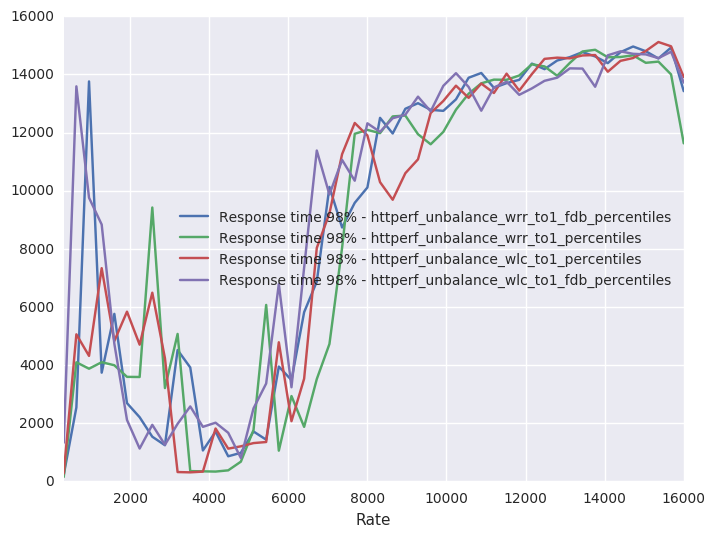

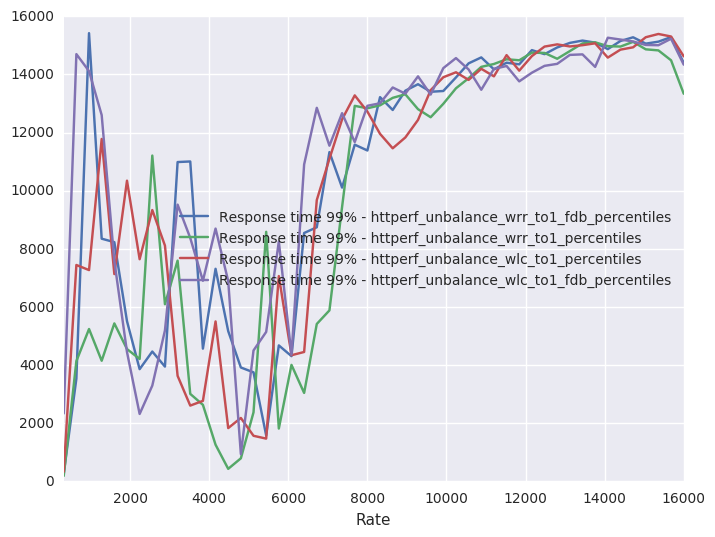

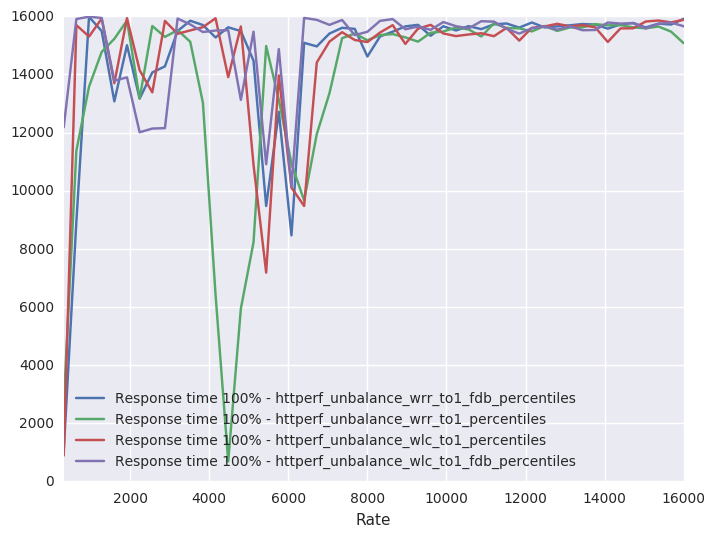

In [70]:
for i in plot_rtp_unbalance_list:
    i.plot('Rate')

In [ ]:
# for i in plot_rtp_balance_list:
#     i.plot('Rate')

## Server side analysis

In [57]:
# read in the data
stats_dict = dict()

for d in glob.glob("./results/" + run_name + "/httperf_*_percentiles"):
    stats_frame = pd.read_csv(d + "/httperf_server_stats.csv", header=0, na_filter=False)
    for i in ['Connections', 'Packets', 'Bytes (K)']:
        stats_frame[i + ' Ratio (%)'] = stats_frame[i] / sum(stats_frame[i]) * 100
    
    stats_dict[os.path.basename(d)] = stats_frame

### 1. Connections ratio (%)

In [58]:
plot_connections_unbalance = pd.DataFrame()
plot_connections_balance = pd.DataFrame()

plot_connections_unbalance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
plot_connections_balance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
    
for d in stats_dict:
    if '_unbalance_' in d:
        plot_connections_unbalance['Connections Ratio (%) - ' + d] = stats_dict[d]['Connections Ratio (%)']
    if '_balance_' in d:
        plot_connections_balance['Connections Ratio (%) - ' + d] = stats_dict[d]['Connections Ratio (%)']

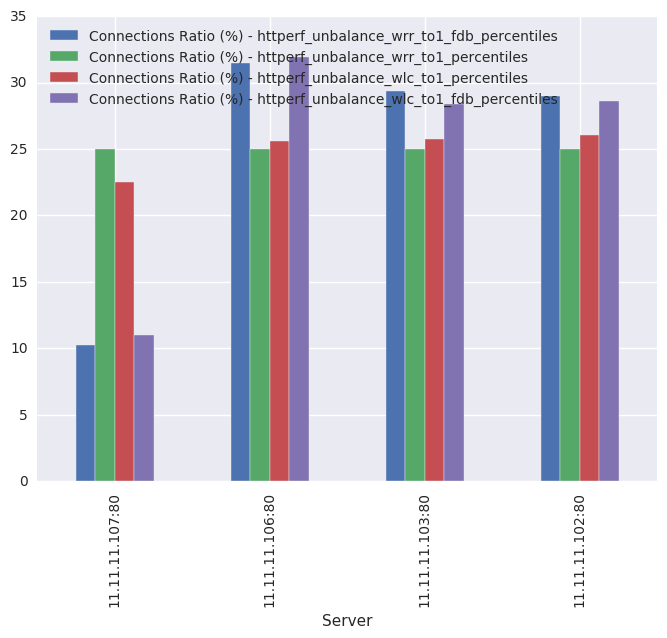

In [59]:
plot_connections_unbalance.plot('Server', kind='bar')

In [61]:
# plot_connections_balance.plot('Server', kind='bar')

### 2. Packets ratio (%)

In [62]:
plot_packets_unbalance = pd.DataFrame()
plot_packets_balance = pd.DataFrame()

plot_packets_unbalance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
plot_packets_balance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
    
for d in stats_dict:
    if '_unbalance_' in d:
        plot_packets_unbalance['Packets Ratio (%) - ' + d] = stats_dict[d]['Packets Ratio (%)']
    if '_balance_' in d:
        plot_packets_balance['Packets Ratio (%) - ' + d] = stats_dict[d]['Packets Ratio (%)']

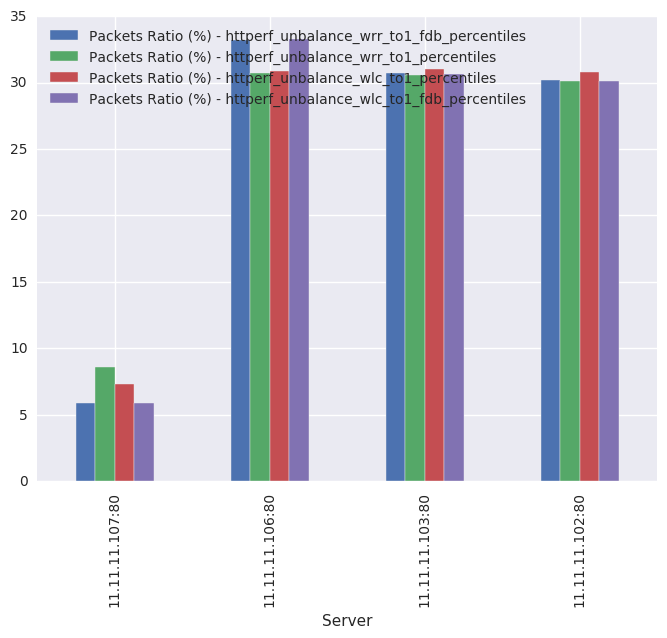

In [63]:
plot_packets_unbalance.plot('Server', kind='bar')

In [64]:
# plot_packets_balance.plot('Server', kind='bar')

### 3. Bytes ratio (%)

In [65]:
plot_bytes_unbalance = pd.DataFrame()
plot_bytes_balance = pd.DataFrame()

plot_bytes_unbalance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
plot_bytes_balance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
    
for d in stats_dict:
    if '_unbalance_' in d:
        plot_bytes_unbalance['Bytes (K) Ratio (%) - ' + d] = stats_dict[d]['Bytes (K) Ratio (%)']
    if '_balance_' in d:
        plot_bytes_balance['Bytes (K) Ratio (%) - ' + d] = stats_dict[d]['Bytes (K) Ratio (%)']

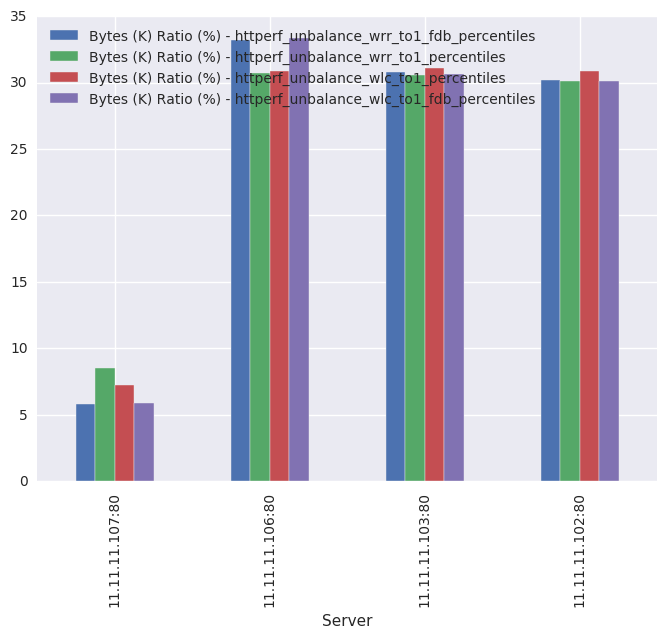

In [66]:
plot_bytes_unbalance.plot('Server', kind='bar')

In [68]:
# plot_bytes_balance.plot('Server', kind='bar')